In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_score

In [2]:
# cargar el dataset de iris
iris = datasets.load_iris()

# crear un dataframe con los datos de iris
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target # columna target


In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


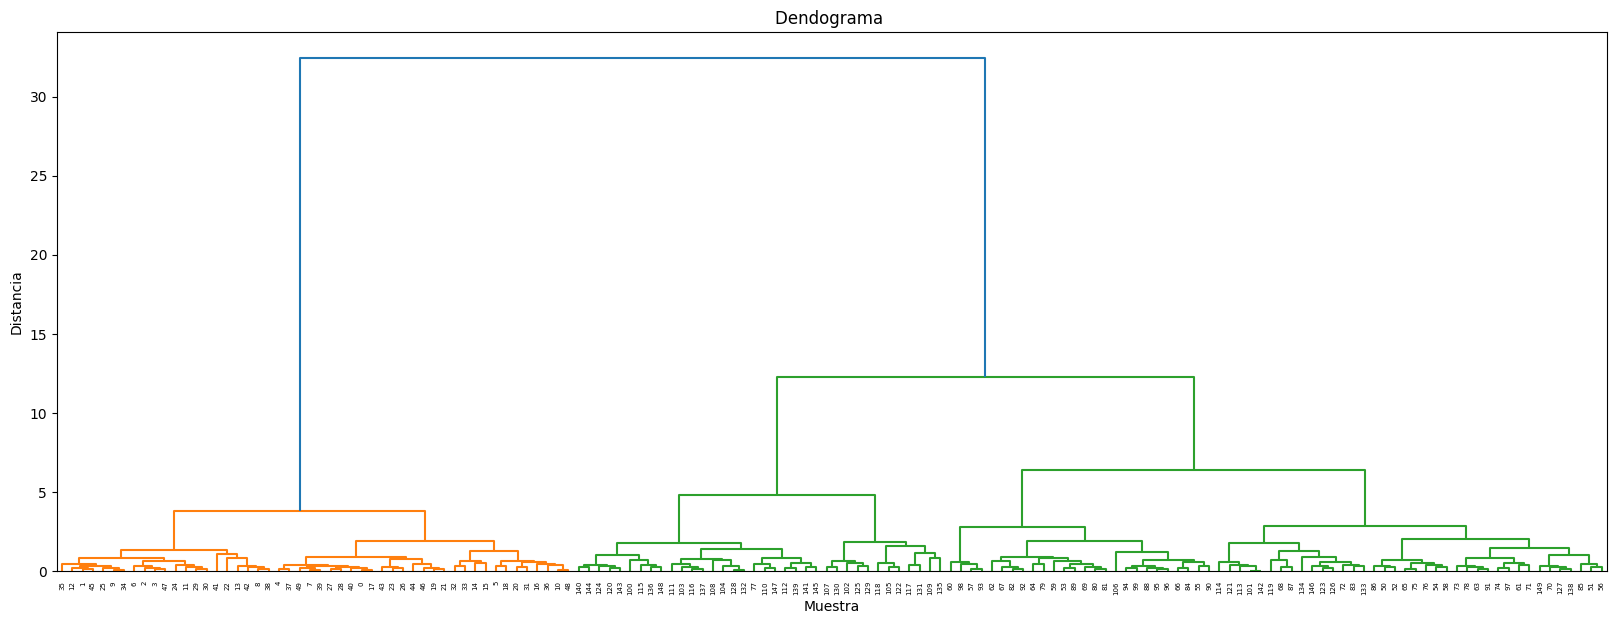

In [5]:
# definir X
X = iris_df.drop(['target'], axis=1)

# generar la matriz de distancias
Z = linkage(X, 'ward') # minimizar la varianza de cada cluster

fig, ax = plt.subplots(figsize=(20, 7)) # tamaño de la figura

# plotear el dendograma
ax.set_title('Dendograma ') # titulo
ax.set_xlabel('Muestra') # etiqueta eje x
ax.set_ylabel('Distancia') # etiqueta eje y

_ = dendrogram(Z, no_labels=False, ax=ax)

In [6]:
# el dendograma nos muestra que hay 3 clusters

In [15]:
# agrupamiento jerarquico

n_clusters = 3 # numero de clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters) # definir el modelo
clustering.fit(X) # entrenar el modelo
labels = clustering.labels_ # obtener las etiquetas

In [8]:
type(X)

pandas.core.frame.DataFrame

Text(0.5, 1.0, 'Clusters')

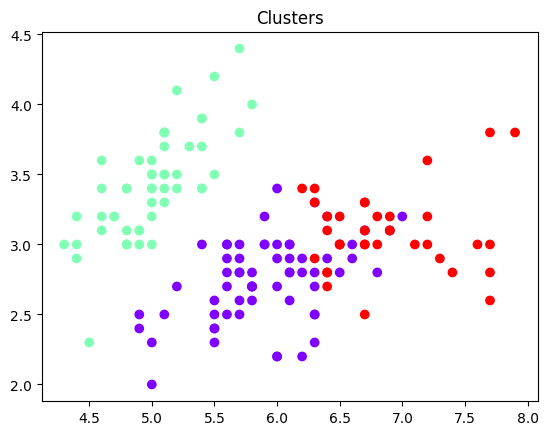

In [16]:
# graficar los clusters
fig, ax = plt.subplots()
scatter = ax.scatter(X.values[:, 0], X.values[:, 1], c=labels, cmap= 'rainbow')
ax.set_title('Clusters')

In [17]:
# indice de silhouete
silhouette_score(X, labels)
print("Índice de silueta:", silhouette_score(X, labels))

Índice de silueta: 0.5543236611296419


In [18]:
# comentario: el indice de silueta es de 0.55, lo cual es un valor aceptable
# Es un indicador positivo, pero no necesariamente representa una separación óptima de los clusters
